<a href="https://colab.research.google.com/github/MostafaAbdallaH686/iris_Analysis/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dataset from: /content/1) iris.csv

Dataset loaded: 150 rows × 5 columns


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



=== Data Structure ===


,Data Type
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object



Categorical Variables Overview:
🔹 species (3 unique values)


,Count
species,
setosa,50
versicolor,50
virginica,50



Missing Values:
✅ No missing values found.

Numerical Feature Summary:


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5



=== Visualizations ===


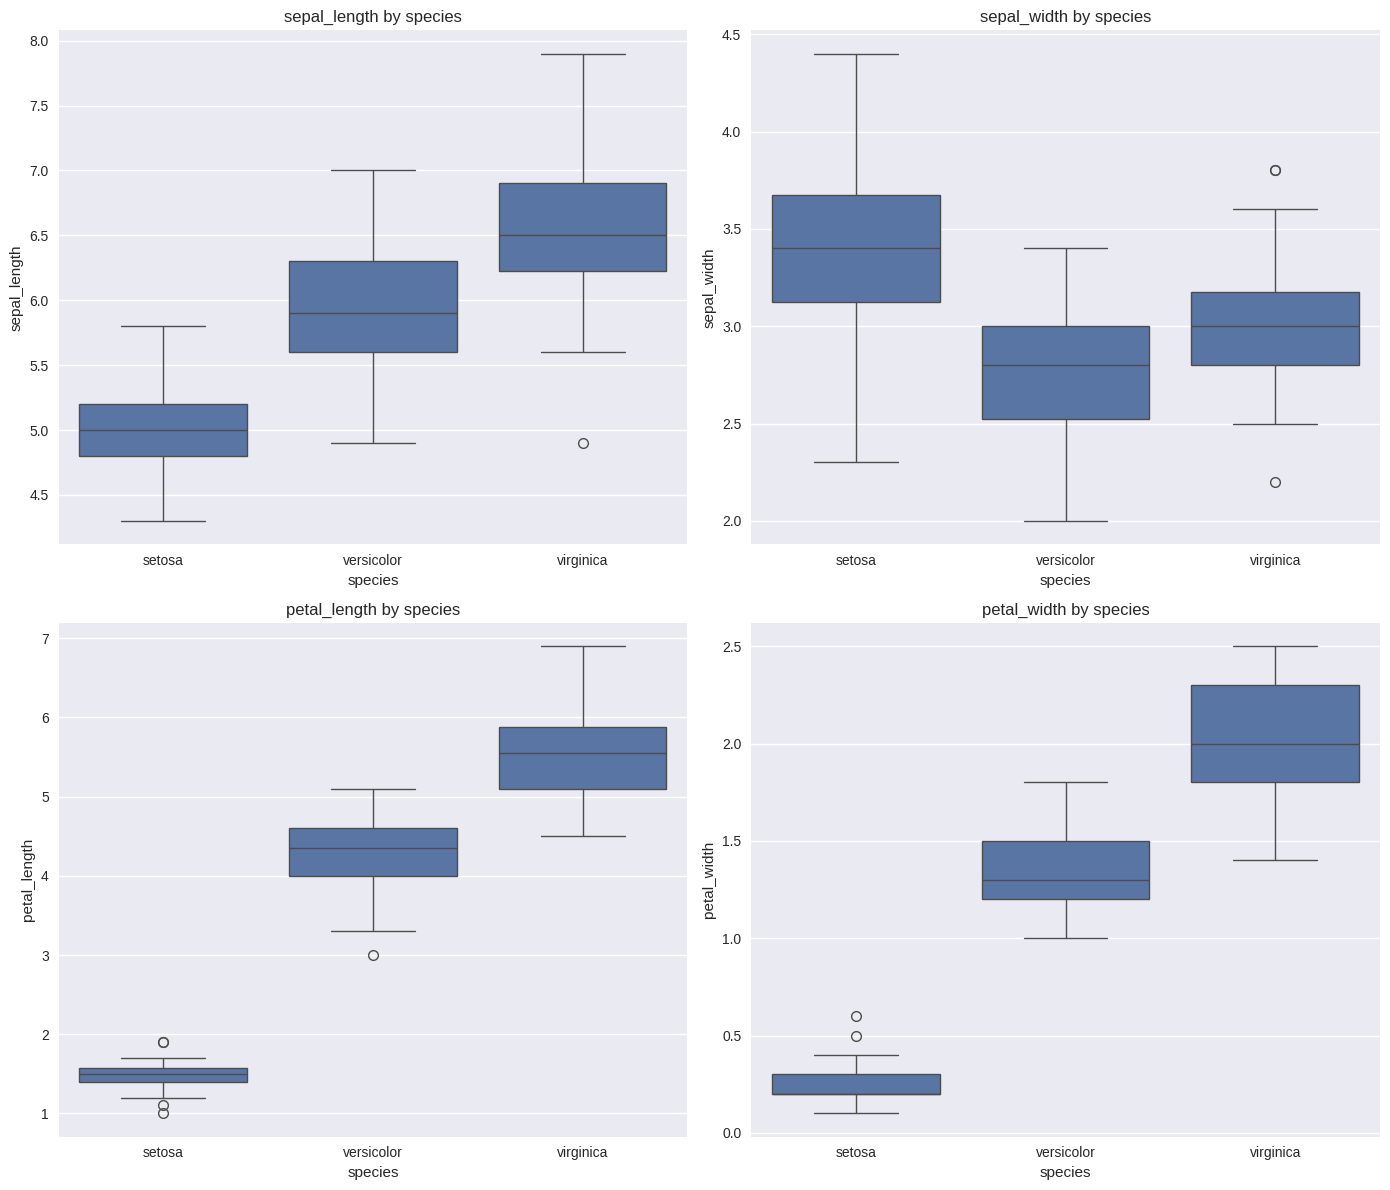

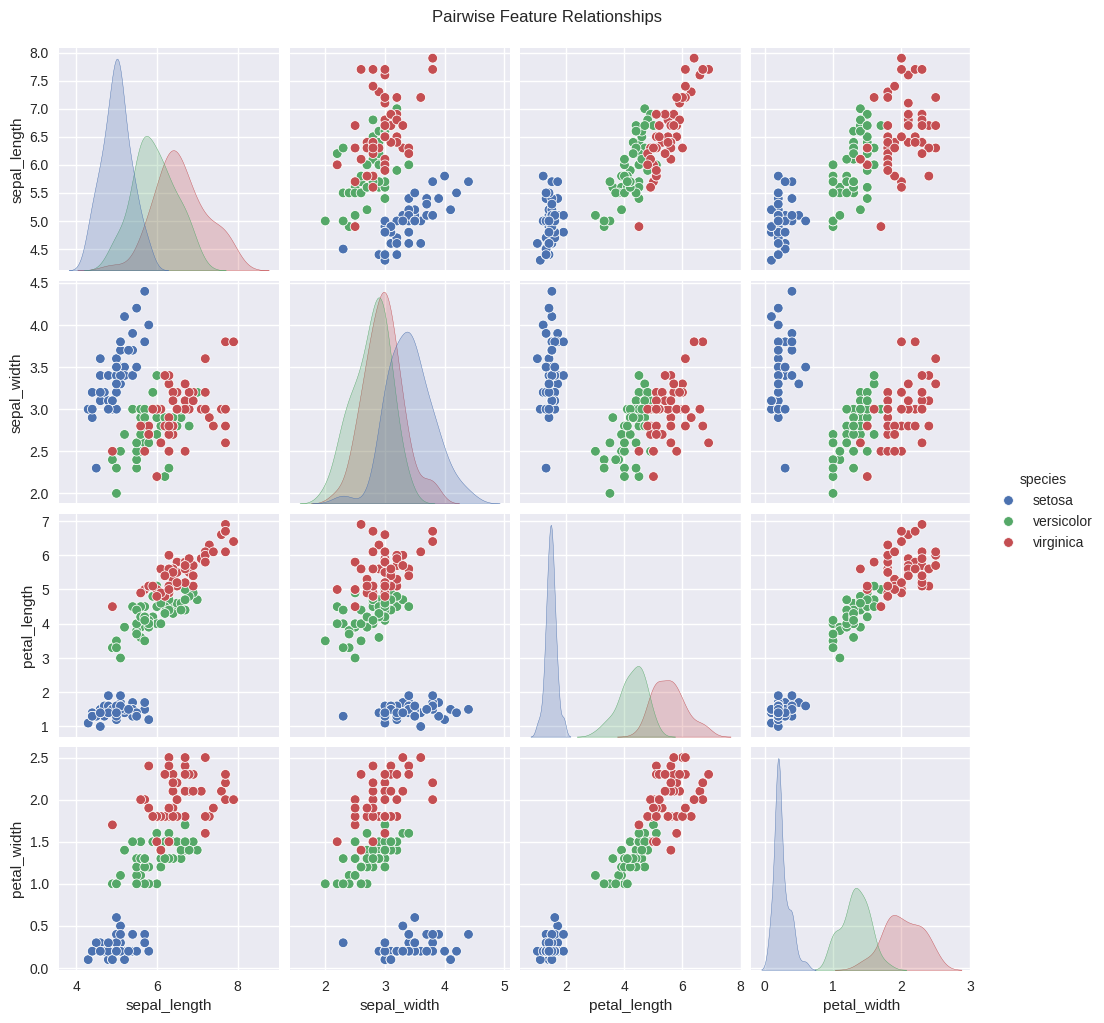

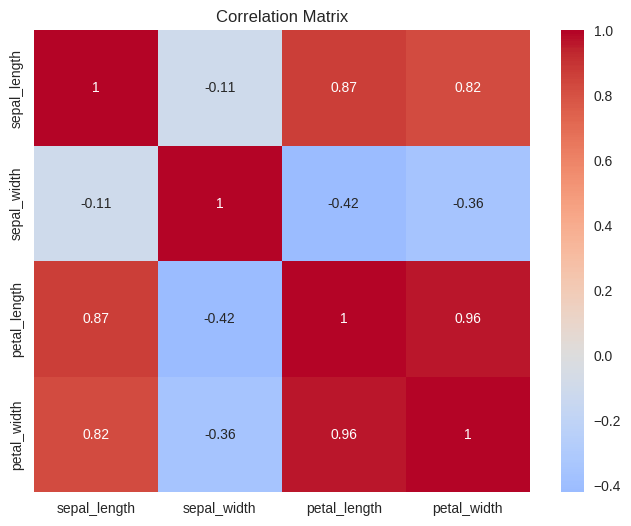

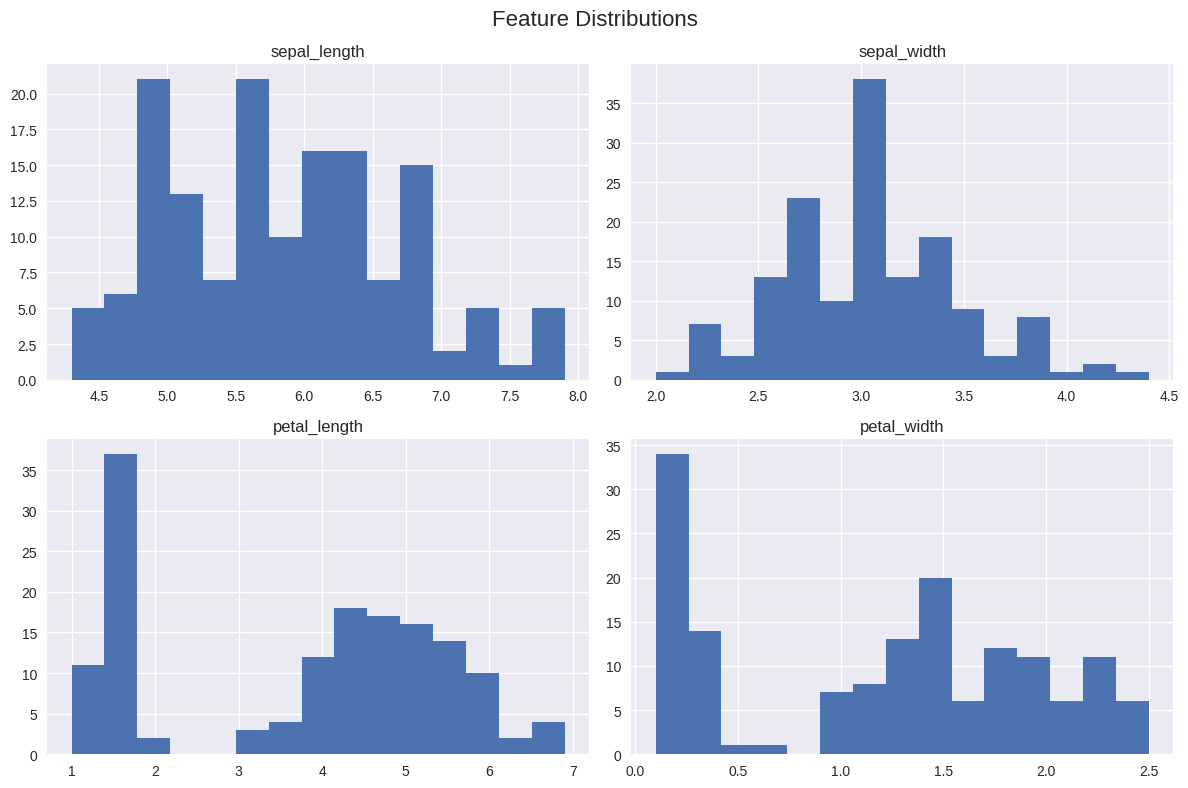


=== Summary ===

Average values per category:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.418000,1.464000,0.244000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.588000,2.974000,5.552000,2.026000



Observations:
- No major missing value issues.
- Strongest numerical correlations:


sepal_length  sepal_length    1.000000
petal_length  petal_width     0.962757
sepal_length  petal_length    0.871754
              petal_width     0.817954
petal_length  sepal_width     0.420516
dtype: float64

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

# ------------------------
# 1. Data Loading & Inspection
# ------------------------
def load_and_inspect_data(filepath):
    """Load CSV and show initial overview."""
    print(f"Loading dataset from: {filepath}\n")

    if not os.path.exists(filepath):
        raise FileNotFoundError(f"File not found: {filepath}")

    df = pd.read_csv(filepath)
    print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
    display(df.head())
    return df

# ------------------------
# 2. Data Structure Analysis
# ------------------------
def analyze_data_structure(df):
    """Analyze data types, categorical counts, missing values, and basic stats."""
    print("\n=== Data Structure ===")
    display(df.dtypes.to_frame("Data Type"))

    # Categorical variables
    cat_cols = df.select_dtypes(include=['object']).columns
    if cat_cols.any():
        print("\nCategorical Variables Overview:")
        for col in cat_cols:
            print(f"{col} ({df[col].nunique()} unique values)")
            display(df[col].value_counts().to_frame("Count"))
    else:
        print("No categorical variables detected.")

    # Missing values
    print("\nMissing Values:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("No missing values found.")
    else:
        display(missing[missing > 0].to_frame("Missing Count"))

    # Summary stats
    print("\nNumerical Feature Summary:")
    display(df.describe().T)

# ------------------------
# 3. Visualizations
# ------------------------
def visualize_data(df):
    """Generate multiple visualizations automatically."""
    print("\n=== Visualizations ===")
    plt.style.use("seaborn-v0_8")

    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # 1. Boxplots by category (if exists)
    if len(cat_cols) == 1 and len(num_cols) > 0:
        cat_col = cat_cols[0]
        fig, axes = plt.subplots(
            nrows=(len(num_cols) + 1) // 2,
            ncols=2,
            figsize=(14, 6 * ((len(num_cols) + 1) // 2))
        )
        axes = axes.flatten()
        for ax, feature in zip(axes, num_cols):
            sns.boxplot(x=cat_col, y=feature, data=df, ax=ax)
            ax.set_title(f"{feature} by {cat_col}")
        plt.tight_layout()
        plt.show()

    # 2. Pairplot
    if len(num_cols) >= 2:
        hue = cat_cols[0] if len(cat_cols) == 1 else None
        sns.pairplot(df, hue=hue, diag_kind="kde")
        plt.suptitle("Pairwise Feature Relationships", y=1.02)
        plt.show()

    # 3. Correlation heatmap
    if len(num_cols) > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
        plt.title("Correlation Matrix")
        plt.show()

    # 4. Histograms
    df[num_cols].hist(figsize=(12, 8), bins=15)
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.tight_layout()
    plt.show()

# ------------------------
# 4. Findings Summary
# ------------------------
def summarize_findings(df):
    """Print high-level observations."""
    print("\n=== Summary ===")
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    if len(cat_cols) == 1:
        cat_col = cat_cols[0]
        means = df.groupby(cat_col)[num_cols].mean()
        print("\nAverage values per category:")
        display(means.style.background_gradient(cmap="Blues"))

    print("\nObservations:")
    print("- No major missing value issues." if df.isnull().sum().sum() == 0 else "- Missing values found, consider imputation.")
    if len(num_cols) > 1:
        corr = df[num_cols].corr().abs().unstack().sort_values(ascending=False)
        print("- Strongest numerical correlations:")
        display(corr.drop_duplicates().head(5))

# ------------------------
# 5. Main
# ------------------------
def main():
    try:
        # Change file path to your CSV
        filepath = "/content/1) iris.csv"
        df = load_and_inspect_data(filepath)
        analyze_data_structure(df)
        visualize_data(df)
        summarize_findings(df)
    except Exception as e:
        print(f" Error: {e}")

if __name__ == "__main__":
    main()
